In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("data.csv")
data = data.dropna()
data = data.drop(columns = ['Unnamed: 0','datetime'] )
all_data = data.values
print(all_data.shape)

(3030, 18)


In [ ]:
data

,open,high,low,close,volume,TA_MomInd_MACD_macd,TA_MomInd_MACD_macdsignal,TA_MomInd_MACD_macdhist,TA_MomInd_CCI,TA_VolInd_ATR,TA_OveInd_upperband,TA_OveInd_middleband,TA_OveInd_lowerband,TA_OveInd_EMA,TA_OveInd_MA,TA_OveInd_MOM,TA_MomInd_ROC,TA_WVAD
33,1.06697,1.07961,1.06470,1.07244,30230,0.010954,0.009772,0.001183,153.551777,0.008295,1.075324,1.062026,1.048728,1.042483,1.040116,0.02608,2.492450,-16.764087
34,1.07239,1.07239,1.07239,1.07239,2,0.011375,0.010093,0.001283,139.531290,0.007706,1.079234,1.065230,1.051226,1.044412,1.041392,0.02223,2.116820,-16.880991
35,1.07277,1.07542,1.07087,1.07476,895,0.011765,0.010427,0.001338,133.354751,0.007480,1.080203,1.069194,1.058185,1.046370,1.043086,0.02258,2.146021,-11.339724
36,1.07472,1.07735,1.06842,1.07342,15289,0.011829,0.010707,0.001121,110.987771,0.007584,1.077342,1.071984,1.066626,1.048115,1.044727,0.01263,1.190622,-14.847685
37,1.07338,1.07474,1.06094,1.06367,20236,0.010966,0.010759,0.000207,39.748531,0.008028,1.079193,1.071336,1.063479,1.049119,1.046102,0.00284,0.267715,-45.712647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,0.91227,0.91279,0.90748,0.91192,8193,-0.005682,-0.006930,0.001248,2.383344,0.006958,0.917847,0.910034,0.902221,0.918998,0.919034,-0.00373,-0.407361,-41.892610
3059,0.91212,0.91262,0.90744,0.90778,8819,-0.005557,-0.006655,0.001098,-45.689182,0.006831,0.916425,0.910834,0.905243,0.918274,0.917961,-0.00902,-0.983857,-63.902180
3060,0.90795,0.91209,0.90720,0.90828,8847,-0.005357,-0.006395,0.001039,-46.510885,0.006692,0.913274,0.909470,0.905666,0.917629,0.916760,-0.00378,-0.414446,-61.244019
3061,0.90773,0.91236,0.90367,0.90909,19312,-0.005074,-0.006131,0.001057,-63.820572,0.006835,0.913184,0.909744,0.906304,0.917078,0.915536,-0.00061,-0.067055,-56.937799


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
all_data[:,5:10] = pca.fit_transform(all_data[:,5:19])
all_data = all_data[:,0:9]
print(all_data[:,3:6])

[[ 1.07244000e+00  3.02300000e+04 -1.59124426e+02]
 [ 1.07239000e+00  2.00000000e+00 -1.45542439e+02]
 [ 1.07476000e+00  8.95000000e+02 -1.41000711e+02]
 ...
 [ 9.08280000e-01  8.84700000e+03  4.56670571e+01]
 [ 9.09090000e-01  1.93120000e+04  6.12799118e+01]
 [ 9.04200000e-01  1.38770000e+04  1.34211875e+02]]


In [ ]:
def maxminnorm(array):
    maxcols=array.max(axis=0)
    print(maxcols)
    mincols=array.min(axis=0)
    data_shape = array.shape
    data_rows = data_shape[0]
    data_cols = data_shape[1]
    t=np.empty((data_rows,data_cols))
    for i in range(data_cols):
        t[:,i]=(array[:,i]-mincols[i])/(maxcols[i]-mincols[i])
    return t

In [ ]:
all_data = maxminnorm(all_data)

[1.16446000e+00 1.17315000e+00 1.16309000e+00 1.16453000e+00
 1.59722000e+05 3.38812077e+02 5.38608364e+01 1.34908080e+01
 4.49453766e-01]


In [ ]:
def input_emb(original_data,seq):
    emb_list = []
    for i in range(0,len(original_data)-seq):
        temp = []
        for j in range(i,i+seq):
            temp.append(original_data[j])
        emb_list.append(temp)
    return emb_list

def label_emb(original_label,seq):
    emb_list = []
    for i in range(seq,len(original_label)):
        emb_list.append(original_label[i])
    return emb_list

In [ ]:
def sp(data,co):
  a = int(len(data)*co)
  train = data[0:a]
  test = data[a+1:]
  return train,test

In [ ]:
X_train,X_test = sp(all_data.tolist(),0.8)

In [ ]:
y_data = data['close'].values
open_list = data['open'].values
low_list = data['low'].values
high_list = data['high'].values

In [ ]:
y_data.shape

(3030,)

In [ ]:
y_train,y_test = sp(y_data.tolist(),0.8)
_,open_data=sp(open_list.tolist(),0.8)
_,low_data=sp(low_list.tolist(),0.8)
_,high_data=sp(high_list.tolist(),0.8)

In [ ]:
test_data = pd.DataFrame(X_test)
test_data['open']=None
test_data['low']=None
test_data['high']=None
test_data['close']=None

test_data['open']=open_data
test_data['low']=low_data
test_data['high']=high_data
test_data['close']=y_test

test_data

,0,1,2,3,4,5,6,7,8,open,low,high,close
0,0.630025,0.608154,0.633177,0.630190,0.112352,0.416445,0.652929,0.438569,0.417401,1.00038,0.99576,1.00082,1.00046
1,0.630973,0.615748,0.638921,0.631948,0.199623,0.381960,0.596912,0.463911,0.414215,1.00080,0.99838,1.00416,1.00124
2,0.631965,0.610746,0.639140,0.631722,0.214411,0.412879,0.586826,0.463295,0.413373,1.00124,0.99848,1.00196,1.00114
3,0.632912,0.613861,0.639754,0.632399,0.183965,0.403555,0.587054,0.458153,0.412834,1.00166,0.99876,1.00333,1.00144
4,0.632280,0.610473,0.631599,0.624284,0.147470,0.568185,0.599927,0.427906,0.411444,1.00138,0.99504,1.00184,0.99784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0.431351,0.407990,0.439648,0.430623,0.051289,0.470991,0.506971,0.458114,0.613412,0.91227,0.90748,0.91279,0.91192
601,0.431013,0.407604,0.439561,0.421291,0.055209,0.550825,0.414786,0.442316,0.608784,0.91212,0.90744,0.91262,0.90778
602,0.421610,0.406399,0.439035,0.422418,0.055384,0.550983,0.443797,0.422102,0.613148,0.90795,0.90720,0.91209,0.90828
603,0.421114,0.407012,0.431296,0.424244,0.120905,0.574897,0.533284,0.411205,0.616858,0.90773,0.90367,0.91236,0.90909


In [ ]:
test_data.to_csv('/content/for_backtesting.csv')

In [ ]:
np.array(y_train).shape

(2424,)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import torch.optim as optim
sequence = 7
input_emb_list_train = input_emb(X_train,sequence)
input_emb_list_val = input_emb(X_test,sequence)
label_emb_list_train = label_emb(y_train,sequence)
label_emb_list_val = label_emb(y_test,sequence)
input_batch_torch = torch.from_numpy(np.array(input_emb_list_train)).float()
target_batch_torch = torch.from_numpy(np.array(label_emb_list_train)).view(-1).float()
val_input = torch.from_numpy(np.array(input_emb_list_val)).float()

val_target =torch.from_numpy(np.array(label_emb_list_val)).view(-1).float()
print(target_batch_torch.numpy().shape)
type(input_batch_torch)

(2417,)


torch.Tensor

In [ ]:
n_input = 9
n_hidden = 50
n_class = 1
total_epoch = 1000
learning_rate = 0.005

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
import torch.optim as optim
class MAPE(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        sub_t = torch.sub(y, x)
        re = torch.abs(torch.div(sub_t,y))
        
       
        return torch.mean(re)
    
class Correlation(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        mean_x = torch.mean(x)
        mean_y = torch.mean(y)
        
        sub_x = x-mean_x
        sub_y = y-mean_y
        
        sum_mul = torch.sum(torch.mul(sub_x,sub_y))
        
        pow_x = sub_x.pow(2)
        pow_y = sub_y.pow(2)
        
        sum_pow = torch.mul(torch.sum(pow_x),torch.sum(pow_y))
        sqrt_re = sum_pow.sqrt()
        
        return sum_mul/sqrt_re

class Theil_U(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x, y):
        sub_t = torch.sub(x,y)
        mean_error = torch.mean(sub_t.pow(2)).sqrt()
        mean_squar_x = torch.mean(x.pow(2)).sqrt()
        mean_squar_y = torch.mean(y.pow(2)).sqrt()
        re = mean_error/(mean_squar_x+mean_squar_y)
       
        return re
        
class LSTM(nn.Module):

    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(n_input, n_hidden, batch_first =True)  
        self.linear = nn.Linear(n_hidden, n_class)


    def forward(self, x):
        
        #h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n,c_n) = self.lstm(x)
        #concat the last hidden state from two direction
        #hidden_out =torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(lstm_out[:,-1,:])
        return z.view(-1)
    
    # Loss function and optimizer
net_lstm = LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(net_lstm.parameters(), lr=learning_rate)


In [ ]:
loss_list_train = []
loss_list_test = []

mape_list_train =[]
mape_list_test =[]

correlation_list_train = []
correlation_list_test = []

Theil_U_list_train =[]
Theil_U_list_test =[]

mape = MAPE()
cor = Correlation()
Theil = Theil_U()
for epoch in range(total_epoch):  
    
    # Set the flag to training
    net_lstm.train()
    
    # forward + backward + optimize
    outputs= net_lstm(input_batch_torch) 
    loss = criterion(outputs, target_batch_torch).sqrt()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Set the flag to evaluation, which will 'turn off' the dropout
    net_lstm.eval()
    output_train = net_lstm(input_batch_torch) 
    output_test = net_lstm(val_input)
    
    # Evaluation loss and accuracy calculation
    loss_train = criterion(output_train, target_batch_torch).sqrt()
    loss_test = criterion(output_test,val_target).sqrt()
    loss_list_train.append(loss_train.item())
    loss_list_test.append(loss_test.item())

    loss_mape_train =mape(output_train, target_batch_torch)
    loss_mape_test =mape(output_test,val_target)
    mape_list_train.append(loss_mape_train.item())
    mape_list_test.append(loss_mape_test.item())

    loss_cor_train = cor(output_train, target_batch_torch)
    loss_cor_test = cor(output_test,val_target)
    correlation_list_train.append(loss_cor_train.item())
    correlation_list_test.append(loss_cor_test.item())

    loss_theil_train = Theil(output_train, target_batch_torch) 
    loss_theil_test = Theil(output_test,val_target)
    Theil_U_list_train.append(loss_theil_train.item())
    Theil_U_list_test.append(loss_theil_test.item())
    
    #acc= accuracy_score(predicted.cpu().numpy(),target_batch_torch.cpu().numpy())

    print('Epoch: %d, loss: %.5f' %(epoch + 1, loss_train.item()))

print('Finished Training')


Epoch: 1, loss: 0.77611
Epoch: 2, loss: 0.62844
Epoch: 3, loss: 0.45156
Epoch: 4, loss: 0.22752
Epoch: 5, loss: 0.06818
Epoch: 6, loss: 0.14764
Epoch: 7, loss: 0.10194
Epoch: 8, loss: 0.02157
Epoch: 9, loss: 0.07371
Epoch: 10, loss: 0.07434
Epoch: 11, loss: 0.03412
Epoch: 12, loss: 0.05207
Epoch: 13, loss: 0.07287
Epoch: 14, loss: 0.05030
Epoch: 15, loss: 0.02142
Epoch: 16, loss: 0.04530
Epoch: 17, loss: 0.04277
Epoch: 18, loss: 0.01995
Epoch: 19, loss: 0.03786
Epoch: 20, loss: 0.04348
Epoch: 21, loss: 0.02352
Epoch: 22, loss: 0.03075
Epoch: 23, loss: 0.04099
Epoch: 24, loss: 0.02806
Epoch: 25, loss: 0.02105
Epoch: 26, loss: 0.03183
Epoch: 27, loss: 0.02169
Epoch: 28, loss: 0.02176
Epoch: 29, loss: 0.02765
Epoch: 30, loss: 0.01671
Epoch: 31, loss: 0.02388
Epoch: 32, loss: 0.02538
Epoch: 33, loss: 0.01393
Epoch: 34, loss: 0.02325
Epoch: 35, loss: 0.01961
Epoch: 36, loss: 0.01613
Epoch: 37, loss: 0.01985
Epoch: 38, loss: 0.01290
Epoch: 39, loss: 0.01841
Epoch: 40, loss: 0.01376
Epoch: 41

In [ ]:
train_after_train=net_lstm(input_batch_torch).detach().numpy()
test_after_train =net_lstm(val_input).detach().numpy()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.save(net_lstm,'/content/lstm_model.pt')
model311 = torch.load('/content/lstm_model.pt')


In [ ]:
test_after_train

array([0.9951954 , 0.9996804 , 0.99350023, 0.99367595, 0.99845594,
       0.99475706, 0.99305475, 0.9886359 , 0.9920081 , 0.9901394 ,
       0.98743093, 0.98976624, 0.98365754, 0.98923457, 0.9884504 ,
       0.989638  , 0.988552  , 1.0014592 , 1.0012009 , 0.9984612 ,
       0.997497  , 1.0004495 , 0.99480706, 0.9900243 , 0.98975253,
       0.99380136, 1.0007119 , 1.0000929 , 0.99219364, 0.9987891 ,
       0.9958283 , 0.99516547, 0.99754786, 0.9920622 , 0.9948511 ,
       0.99593544, 0.9998445 , 1.0056107 , 1.0046906 , 0.9991356 ,
       1.0021718 , 1.002305  , 1.002108  , 0.99471533, 0.99444854,
       0.99602634, 0.9934169 , 0.9960284 , 0.9960187 , 0.9905338 ,
       0.9925539 , 0.995013  , 0.99855316, 0.9969201 , 1.0007756 ,
       0.9979234 , 0.9971051 , 0.9964592 , 0.9992884 , 0.99548775,
       0.9970914 , 0.9972708 , 1.0009129 , 0.99904037, 0.9915961 ,
       0.98770183, 0.9857458 , 0.98901844, 0.98535025, 0.9834553 ,
       0.9799677 , 0.9749309 , 0.97226167, 0.9713012 , 0.97261

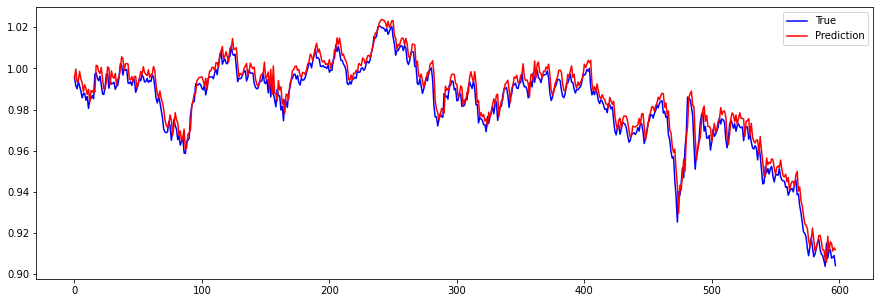

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(label_emb_list_val,'blue',label='True')
plt.plot(test_after_train,'red',label='Prediction')
plt.legend()
plt.show()

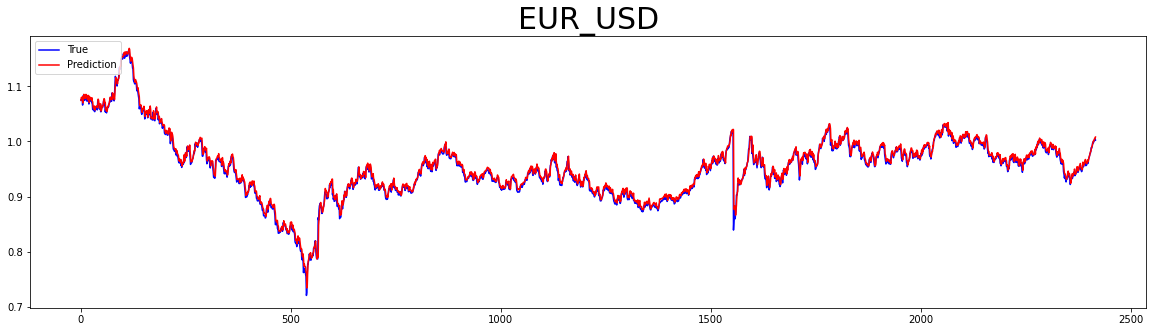

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(target_batch_torch,'blue',label='True')
plt.plot(train_after_train,'red',label='Prediction')

plt.title('EUR_USD',fontsize=  '30')
plt.legend(loc="upper left")

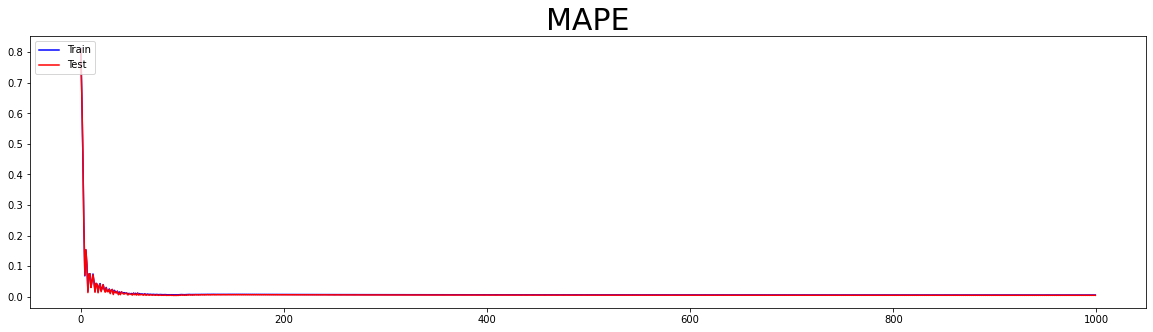

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(mape_list_train,'blue',label='Train')
plt.plot(mape_list_test,'red',label='Test')

plt.title('MAPE',fontsize=  '30')
plt.legend(loc="upper left")

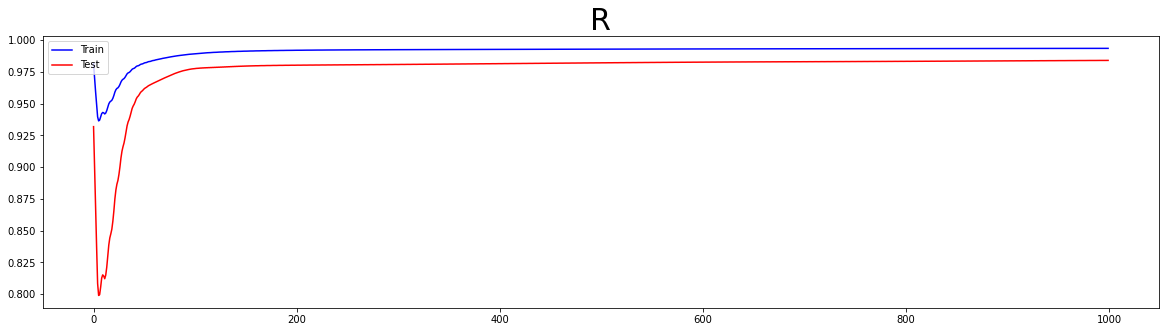

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(correlation_list_train,'blue',label='Train')
plt.plot(correlation_list_test,'red',label='Test')

plt.title('R',fontsize=  '30')
plt.legend(loc="upper left")

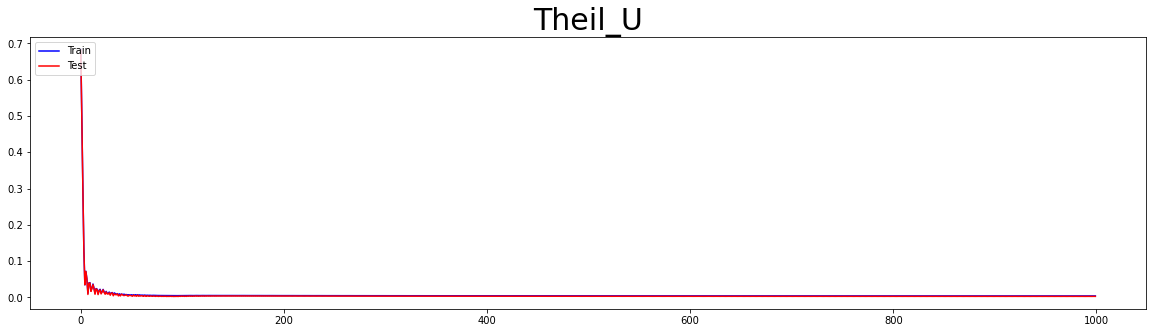

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(Theil_U_list_train,'blue',label='Train')
plt.plot(Theil_U_list_test,'red',label='Test')

plt.title('Theil_U',fontsize=  '30')
plt.legend(loc="upper left")

In [ ]:
print('Mape:%.5f, R:%.5f, Theil_U:%.5f'%(mape_list_test[-1],correlation_list_test[-1],Theil_U_list_test[-1]))

Mape:0.00422, R:0.98403, Theil_U:0.00265


In [ ]:
k=loss_list_test[-1]
k

0.005217798054218292

In [ ]:
torch.save(net_lstm,'lstm_model.pt')



In [ ]:
name=['close']
test=pd.DataFrame(columns=name,data=test_after_train)
print(test)
test.to_csv('./backtesting_USD_JPY.csv',encoding='gbk')

        close
0    0.995195
1    0.999680
2    0.993500
3    0.993676
4    0.998456
..        ...
593  0.915768
594  0.914916
595  0.911211
596  0.912807
597  0.911940

[598 rows x 1 columns]


In [ ]:
print(mape_list_test.index(min(mape_list_test)))
print(Theil_U_list_test.index(min(Theil_U_list_test)))
print(correlation_list_test.index(max(correlation_list_test)))

94
94
999
